## Summary 

Thank you for your interest in Vira Health's data team!  

This jupyter notebook contains instructions for a short task which will give you an insight into some of what Vira Health is working on.   

The task is structured around building a simple report that summarises what you think are the important and interesting characteristics of the datasets provided.  

The task is purposely open-ended and we're most interested in seeing how you approach it rather than expecting a complete, sophisticated analysis. 
As such, we would encourage you to spend no more than 2-4 hours on the task.  

Data provided is courtesy of the Study of Women's Health Across the Nation (SWAN) and is publically available from their [website](https://www.swanstudy.org/).      

Additional documentation can be found in the ICPSR data repository [here](https://www.icpsr.umich.edu/web/ICPSR/series/00253) and may be helpful to support completion of the task.  

## Step 1: Data exploration 

The /data folder includes data from a questionnaire collected at baseline ("swan_1996_97_baseline.csv") and two annual follow-up visits ("swan_1997_99_visit1.csv", "swan_1998_00_visit2.csv").  

Documentation for the baseline visit with details of the questionnaire and variables referenced is also included in the /data folder as "baseline-visit-codebook-PI.pdf".  

As a first step, please load in the data in this python notebook and conduct whatever exploration you need to decide - **"What are the important and interesting characteristics of these datasets?"**.   

To help focus, remember that the overall aim of the task is to **build a simple report that summarises what you think are the important and interesting characteristics of the datasets**.    

Example exploration could include answering sub-questions such as, what is the size of each sample? how many participants have data in all follow-up visits?  

Please include inline code comments or markdown to explain your approach.  

Note, this exploration is not expected to be comprehensive, but if there are further analyses you would conduct to help you understand these datasets please include them in your commentary and explain what you would do.    

### Setup and Initial Investigation

In [ ]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Creating requirements file
# !pip freeze > requirements.txt

Begin by importing the necessary packages.

Import the baseline csv file.

In [ ]:
df_baseline = pd.read_csv('swan_1996_97_baseline.csv',
                          encoding="ISO-8859-1",
                          low_memory=False
                          )

Get an idea of the shape of the file and a high level summary of the fields.

In [3]:
# Get a high level summary of the dataframe to get an idea of the size
print(df_baseline.shape)
#3302 rows and 741 columns

# Use describe to get a summary of columns
df_baseline.describe()

(3302, 741)


,SWANID,VISIT,INTDAY0,AGE0,HCRMYS0,HORMYS0,ESTRYS0,BCPYS0,INSUEVM0,THYREVM0,...,LPA1RES0,APOARES0,APOBRES0,CRPRESU0,SPSCDAY0,HPSCDAY0,SPBMDT0,HPBMDT0,BMDFLG0,LMPDAY0
count,3302.000000,3302.0,3302.0,3297.000000,0.0,0.0,0.0,0.0,88.000000,247.000000,...,3268.000000,3275.000000,3274.000000,3245.000000,2328.000000,2331.000000,2307.000000,2328.000000,3.0,3184.000000
mean,54361.658389,0.0,0.0,45.849560,NaN,NaN,NaN,NaN,55.931818,54.303644,...,49.279682,149.677557,111.382407,3.895742,8.329897,8.357357,1.077564,0.963650,5.0,-52.086369
std,25723.741173,0.0,0.0,2.689278,NaN,NaN,NaN,NaN,77.557068,77.533948,...,11.329800,25.174016,29.486237,6.260642,20.900203,20.931600,0.139197,0.146181,0.0,28.174957
min,10005.000000,0.0,0.0,42.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,...,20.000000,73.000000,34.000000,0.043000,-105.000000,-105.000000,0.719500,0.540400,5.0,-211.000000
25%,31808.000000,0.0,0.0,44.000000,NaN,NaN,NaN,NaN,4.000000,6.000000,...,41.000000,132.000000,90.250000,0.600000,0.000000,0.000000,0.978195,0.859250,5.0,-69.000000
50%,54230.000000,0.0,0.0,46.000000,NaN,NaN,NaN,NaN,24.000000,24.000000,...,48.000000,148.000000,108.000000,1.600000,0.000000,0.000000,1.074800,0.952850,5.0,-47.000000
75%,76744.500000,0.0,0.0,48.000000,NaN,NaN,NaN,NaN,72.000000,72.000000,...,56.000000,165.000000,129.000000,4.700000,0.000000,0.000000,1.165800,1.053825,5.0,-31.000000
max,99992.000000,0.0,0.0,53.000000,NaN,NaN,NaN,NaN,384.000000,480.000000,...,122.000000,317.000000,274.000000,105.600000,228.000000,228.000000,1.635700,1.539500,5.0,0.000000


SWANID is the primary key. Take a closer look at this field in terms of completeness and uniqueness.

In [4]:
# Does everyone have a non-null SWANID?
null_check = df_baseline["SWANID"].isnull().sum()
print('There are ', null_check, ' null values for SWANID in the baseline file.')

# Are the SWANID values unique?
unique_check = df_baseline['SWANID'].duplicated().sum()
print('\nThere are ', unique_check, ' duplicated values for SWANID in the baseline file.')

There are  0  null values for SWANID in the baseline file.

There are  0  duplicated values for SWANID in the baseline file.


To get a better view of the data, use pandas profiling. Since there are so many columns, start with a subset of columns as an example. Note: I was having trouble getting this output to show in GitHub, so I've included a file in this repo called `ProfileReport.html` where you can view this output, if desired.

In [22]:
df_baseline_cols = df_baseline.iloc[:, : 50]
summary = ProfileReport(df_baseline_cols)
# display(summary)

# Saving to html format since it wasn't showing up in GitHub
summary.to_file("ProfileReport.html")

This summary helps highlight potential issues in the data to pay attention to, such as unsupported type columns or columns with a constant value. These are things I would take a closer look at if given more time. Two things that jumped out at me: 
* Many fields are coded in a format like "(1) No" and "(2) Yes" or similar and that would be an impactful fix to focus on for data cleaning.
* Numerical fields have negative numbers at times. These are codes for categories like missing, refused, etc. This is important to note if taking summary stats on a numerical column.

If time allowed, I would want to take a close look at all the remaining columns that I excluded here to see whether there are other things to clean up such as date formats, null values coded inconsistently (NA vs. blank string), and more.

Given the time limit on this request, I will focus on the SWANID and continuing on to explore the other files. Once I get a better idea of which variables may be the most interesting to summarize, I can clean those on an ad-hoc basis for the visualizations.

### Import and Investigate Remaining Files 

In [6]:
df_visit1 = pd.read_csv('swan_1997_99_visit1.csv',
                          encoding="ISO-8859-1",
                          low_memory=False
                          )

df_visit2 = pd.read_csv('swan_1998_00_visit2.csv',
                          encoding="ISO-8859-1",
                          low_memory=False
                          )

Do similar checks on the dataset size. Create a summary.

In [7]:
# Do similar checks on the dataset size
print("df_visit1 rows and columns: ", df_visit1.shape)
# 2281 rows and 576 columns

# Use describe to get a summary of columns
print(df_visit1.describe())

print("df_visit2 rows and columns: ", df_visit2.shape)
# 2748 rows and 551 column

print(df_visit2.describe())

df_visit1 rows and columns:  (2881, 576)
             SWANID   VISIT      INTDAY1         AGE1      DAYBLE1  \
count   2881.000000  2881.0  2867.000000  2872.000000  1951.000000   
mean   54536.784450     1.0   377.128706    46.923747   386.369042   
std    25711.837018     0.0    47.366382     2.697852    50.618210   
min    10046.000000     1.0   202.000000    42.000000   200.000000   
25%    31971.000000     1.0   346.500000    45.000000   350.000000   
50%    54409.000000     1.0   370.000000    47.000000   380.000000   
75%    76935.000000     1.0   400.000000    49.000000   416.000000   
max    99992.000000     1.0   706.000000    54.000000   703.000000   

           SPEDAY1  EINJTW21  COMBTW21  PROGTW21  PROGDA21  ...     TPARESU1  \
count  2763.000000       0.0       0.0       0.0       0.0  ...  2582.000000   
mean    401.000362       NaN       NaN       NaN       NaN  ...     8.776104   
std      58.887050       NaN       NaN       NaN       NaN  ...     7.452743   
min     

Check the primary key for uniqueness and completeness.

In [8]:
# Does everyone have a non-null SWANID?
print("Null values in df_visit1 SWANID: "
      , df_visit1["SWANID"].isnull().sum())

nullcheck = df_visit2["SWANID"].isnull().sum()
print("Null values in df_visit2 SWANID: ",
      df_visit2["SWANID"].isnull().sum())

# Are the SWANID values unique?
print("Duplicated SWANID values in df_visit1: "
      , df_visit1['SWANID'].duplicated().sum())

print("Duplicated SWANID values in df_visit2: "
      , df_visit2['SWANID'].duplicated().sum())

Null values in df_visit1 SWANID:  0
Null values in df_visit2 SWANID:  0
Duplicated SWANID values in df_visit1:  0
Duplicated SWANID values in df_visit2:  0


In [9]:
Next, check the overlap of SWANID values across the files. Are my assumptions about how the files join together correct?

Object `correct` not found.


In [10]:
# Expect all SWANID values from df_visit1 and df_visit2 to be in baseline. Looking for any false values, which indicates these assumptions have been violated.
print('\nComparing df_visit1 to df_baseline:\n', 
      df_visit1['SWANID'].isin(df_baseline['SWANID']).value_counts())

print('\nComparing df_visit2 to df_baseline:\n', 
      df_visit2['SWANID'].isin(df_baseline['SWANID']).value_counts())


# Likewise, all in df_visit2 to be in df_visit1.
print('\nComparing df_visit1 to df_visit2:\n', 
      df_visit2['SWANID'].isin(df_visit1['SWANID']).value_counts())


Comparing df_visit1 to df_baseline:
 True    2881
Name: SWANID, dtype: int64

Comparing df_visit2 to df_baseline:
 True    2748
Name: SWANID, dtype: int64

Comparing df_visit1 to df_visit2:
 True     2641
False     107
Name: SWANID, dtype: int64


There are some participants in df_visit2 but not df_visit1. I would not expect that you could have a second visit without a first visit. I did not find anything specific in the codebook that addressed this. I will keep the data as is and highlight it as a caveat if relevant in my later findings. All other assumptions checked out.

### Join Files

Given the data structure, I will do left joins to the baseline files.

In [11]:
df_baseline_visit1 = df_baseline.merge(df_visit1, on='SWANID', how ='left')
df_combined= df_baseline_visit1.merge(df_visit2, on='SWANID', how = 'left')

Quick check that I did not mess anything up

In [12]:
# Confirm that the number of rows we end up with is identical to the number of rows in df_baseline (3302)
df_combined.shape

(3302, 1866)

This is not an ideal way to join all this data together. It results in an unusable amount of columns and the data is still very messy.
However, given the time constraints, I made the decision to merge everything together. I will later choose a subset of columns that appear most useful and clean those up as needed.

### Choosing Fields of Interest

At time point, I went back and referred to the codebook to identify variables that may be of particular interest. This includes fields about demographic information, menopause status, and lab values. I ran initial counts and summaries on variables that seemed the most useful. Here is an example.

In [13]:
# Demographic data is likely of interest
print(df_combined['AGE0'].describe())

count = df_combined['RACE'].value_counts() 
print('\n',count) 

#Menopausal status is one to compare over time
count = df_combined['STATUS0'].value_counts() 
print('\n', count) 

count    3297.000000
mean       45.849560
std         2.689278
min        42.000000
25%        44.000000
50%        46.000000
75%        48.000000
max        53.000000
Name: AGE0, dtype: float64

 (4) Caucasian/White Non-Hispanic    1334
(1) Black/African American           741
(3) Japanese/Japanese American       263
(2) Chinese/Chinese American         234
(5) Hispanic                         176
Name: RACE, dtype: int64

 (5) Pre-menopausal           1761
(4) Early Peri               1493
(7) Unknown due to HT use       6
Name: STATUS0, dtype: int64


I did a bit more data cleaning on the key fields I identified. Below I am cleaning the visit fields to get counts of how many participants were in each file. This will be useful in the next section for reporting.

In [14]:
# Rename visit columns for clarity
df_combined = df_combined.rename(columns={'VISIT': 'SECOND_VISIT', 'VISIT_x': 'BASELINE_VISIT', 'VISIT_y':'FIRST_VISIT'})

# Recode values for clarity
df_combined[['BASELINE_VISIT', 'FIRST_VISIT', 'SECOND_VISIT']] = np.where(df_combined[['BASELINE_VISIT', 'FIRST_VISIT', 'SECOND_VISIT']].isna(), 'Not Present', 'Present')

# Create a list of logic used to recode visits into a single summarized field
conditions = [
    (df_combined['FIRST_VISIT'] == 'Present') & (df_combined['SECOND_VISIT'] == 'Present'),
    (df_combined['FIRST_VISIT'] == 'Present') & (df_combined['SECOND_VISIT'] == 'Not Present'),
    (df_combined['FIRST_VISIT'] == 'Not Present') & (df_combined['SECOND_VISIT'] == 'Present'),
    (df_combined['FIRST_VISIT'] == 'Not Present') & (df_combined['SECOND_VISIT'] == 'Not Present'),
    ]

# create a list of the values we want to assign to each category
values = ['All 3 visits', '2 visits (baseline and first)', '2 visits (baseline and second)', '1 visit (baseline)']

# create a new column and use np.select to assign values to it using our lists as arguments
df_combined['VISIT_SUMMARY'] = np.select(conditions, values)

### Create a Subset of Data for Participants in All Files

I created a dataframe contained only the records where there was a baseline and two visits. Some analysis will focus on these participants, as they have the most robust longitudinal data for them. In this part, I also limit the dataset to the variables that seemed most relevant for reporting.

In [15]:
# Create a dataframe with just the SWANID values in every file
df_all_visits = df_combined.loc[(df_combined['VISIT_SUMMARY']=='All 3 visits')]

# Pick the columns to focus on
df_subset = df_all_visits[['SWANID', # ID
                     'AGE0', 'RACE', 'NUMPREG0', #Demographics
                     'VISIT_SUMMARY',
                     'HEIGHT0', 'HEIGHT1', 'HEIGHT2', 'WEIGHT0', 'WEIGHT1', 'WEIGHT2', # Height and weight
                     'STATUS0', 'STATUS1', 'STATUS2', 'HLTHAYR0', 'OVERHLT1', 'OVERHLT2', 'BCEVER0', 'SMOKERE0', 'SMOKENO0', # Health factors
                     'HOTFLAS0', 'HOTFLAS1', 'HOTFLAS2', 'FLASHPH0', 'FLASHEB0', 'FLASHEM0', # Hot flash questions
                     'PREPAID0', 'OTHRPRI0', 'MEDICAR0', 'MEDICAI0', 'MILITAR0', 'NOINSUR0', 'OTHINSU0', # Insurance
                     'FSH0', 'FSH1', 'FSH2', 'T0', 'T1', 'T2', 'E2AVE0', 'E2AVE1', 'E2AVE2', 'DHAS0', 'DHAS1', 'DHAS2', #Hormone measures 
                     'CHOLRES0', 'CHOLRES1', 'HDLRESU0', 'HDLRESU1', 'LDLRESU0', 'LDLRESU1', # Cholesterol measures
                     'SPBMDT0', 'SPBMDT1', 'SPBMDT2', 'HPBMDT0', 'HPBMDT1', 'HPBMDT2' # Bone density scan
                     ]]

Do some extra cleaning so the fields with numerical prefixes do not show in our report.

In [16]:
# Replace the values like '(#)' in this subset using regex
df_subset = df_subset.replace(value='', regex=r'^\(\d+\) ')

Recode key fields into groups where appropriate

In [17]:
# Recode menopause status into categories so we can track over time

status_mapping = {'Natural post':'Post menopause',
                  'Post by BSO (Bilateral Salpingo Oophorectomy)':'Post menopause',
                  'Post by BSO':'Post menopause',
                  'Late peri':'Peri-menopause',
                  'Early peri':'Peri-menopause',
                  'Pre-menopausal':'Pre-menopause',
                  'Pre-menopause':'Pre-menopause',
                  'Pregnant/breastfeeding':'Pregnant/breastfeeding',
                  'Unknown due to HT use':'Unknown',
                  'Unknown due to hysterectomy':'Unknown'}

                 
df_subset['STATUS2_RECODE'] = df_subset['STATUS2'].map(status_mapping)
df_subset['STATUS1_RECODE'] = df_subset['STATUS1'].map(status_mapping)
df_subset['STATUS0_RECODE'] = df_subset['STATUS0'].map(status_mapping)

In [18]:
# Recode latest hot flash question into categories

hot_flash_mapping = {'Not At All':'No hot flashes',
                     'Not at all': 'No hot flashes', #Capitalization differed by file
                  '1-5 Days':'Hot flashes',
                  '1-5 days': 'Hot flashes',
                  '6-8 Days':'Hot flashes',
                  '6-8 days': 'Hot flashes',
                  '9-13 Days':'Hot flashes',
                  '9-13 days':'Hot flashes',
                  'Every Day':'Hot flashes',
                  'Every day':'Hot flashes'
                    }

                 
df_subset['HOTFLAS0_RECODE'] = df_subset['HOTFLAS0'].map(hot_flash_mapping)
df_subset['HOTFLAS1_RECODE'] = df_subset['HOTFLAS1'].map(hot_flash_mapping)
df_subset['HOTFLAS2_RECODE'] = df_subset['HOTFLAS2'].map(hot_flash_mapping)

## Step 2: Data reporting

Now you have a basic understanding of the data, the next step is to **build a simple report that summarises the characteristics you have identified**.  

The decision of how to structure and format this report is up to you, but it should be reproducible from this script. For example, a pandas dataframe, csv file, set of charts etc.  

Don't worry about 'perfect' styling - we understand this can take a lot of time and we're most interested in your overall approach and the core components of your implementation.  

As in step 1, in your written code, please include inline code comments or markdown to explain your approach.  

### Demographics of All Study Participants

Finally, I took the resulting dataframes and created visualizations.

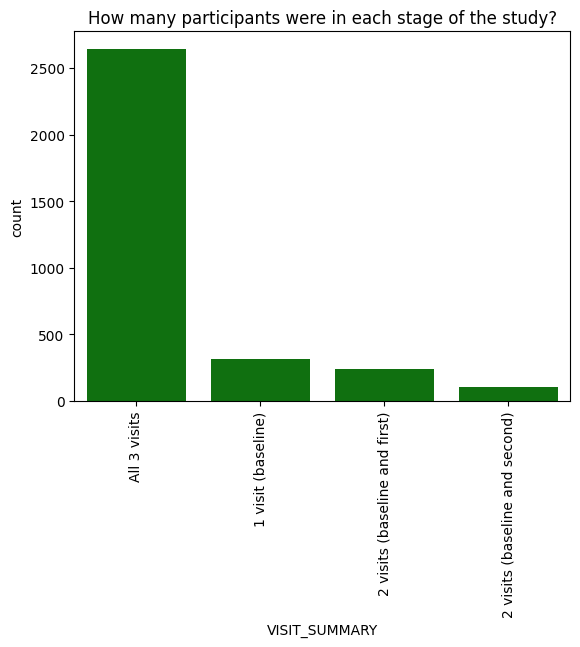

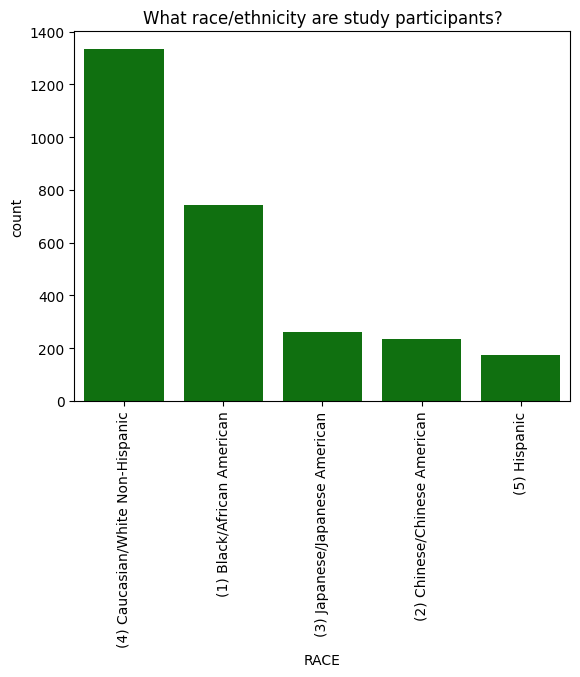

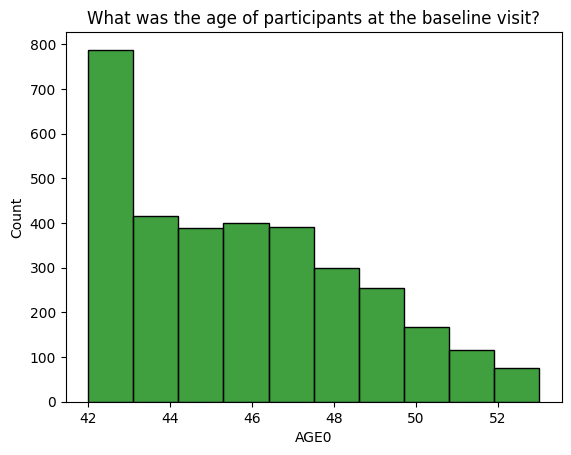

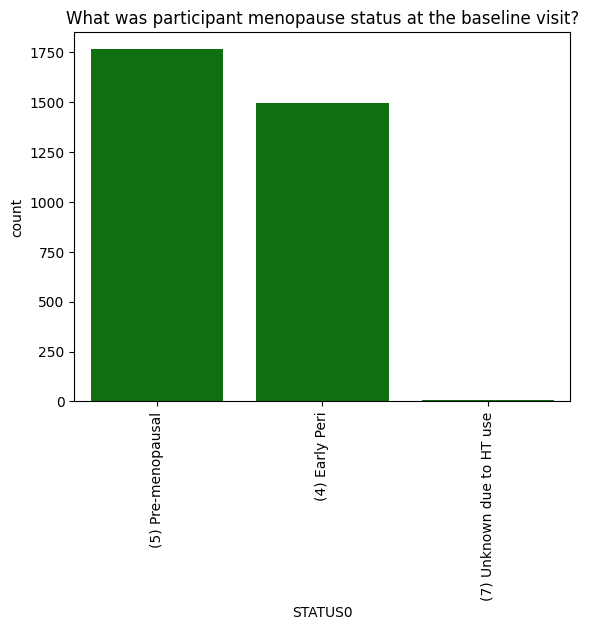

In [19]:
ax1=sns.countplot(df_combined, x='VISIT_SUMMARY', color = 'green', order = df_combined['VISIT_SUMMARY'].value_counts().index)
plt.xticks(rotation=90)
plt.title('How many participants were in each stage of the study?')
plt.grid(False)
plt.show()

ax2=sns.countplot(df_combined, x='RACE', color = 'green', order = df_combined['RACE'].value_counts().index)
plt.xticks(rotation=90)
plt.title('What race/ethnicity are study participants?')
plt.grid(False)
plt.show()

ax3=sns.histplot(df_combined, x='AGE0', color = 'green', bins=10)
plt.grid(False)
plt.title('What was the age of participants at the baseline visit?')
plt.show()

ax4=sns.countplot(df_combined, x='STATUS0', color = 'green', order = df_combined['STATUS0'].value_counts().index)
plt.title('What was participant menopause status at the baseline visit?')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

Create additional visualizations limited to only participants who attended all 3 visits

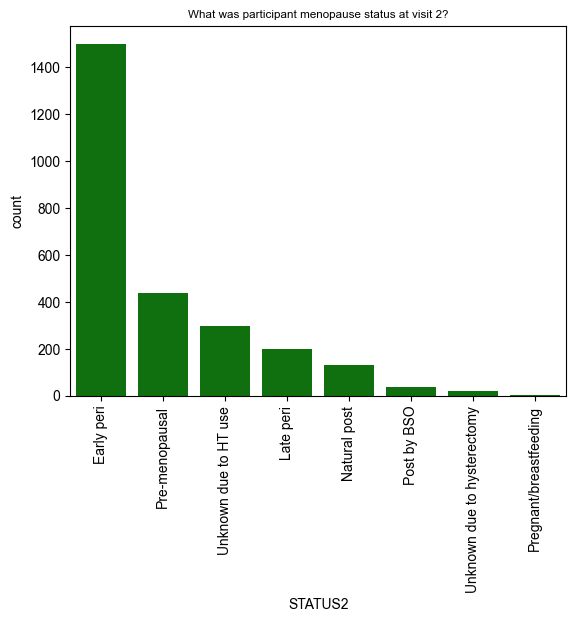

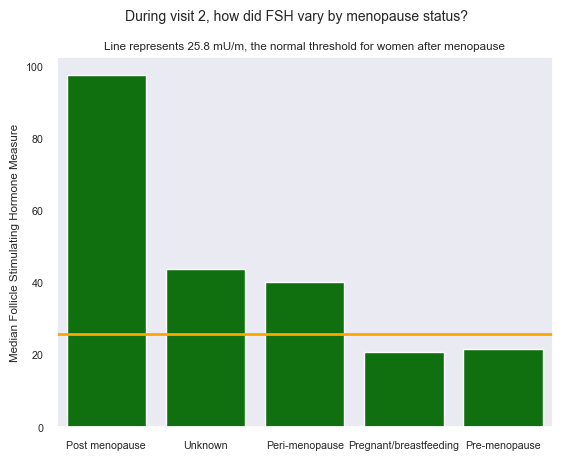

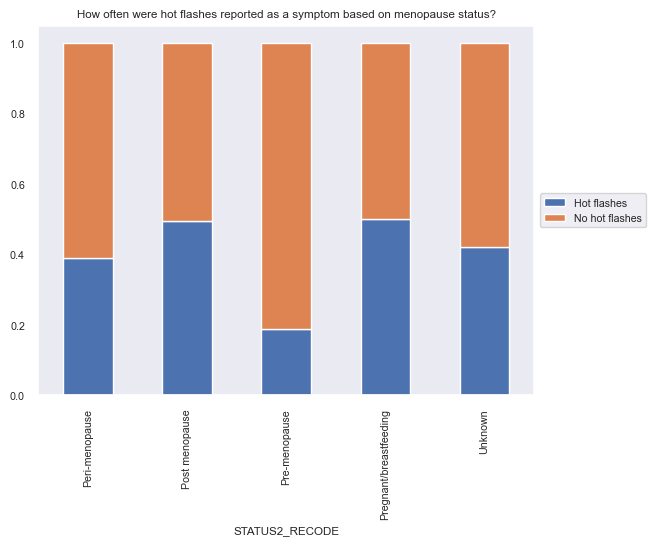

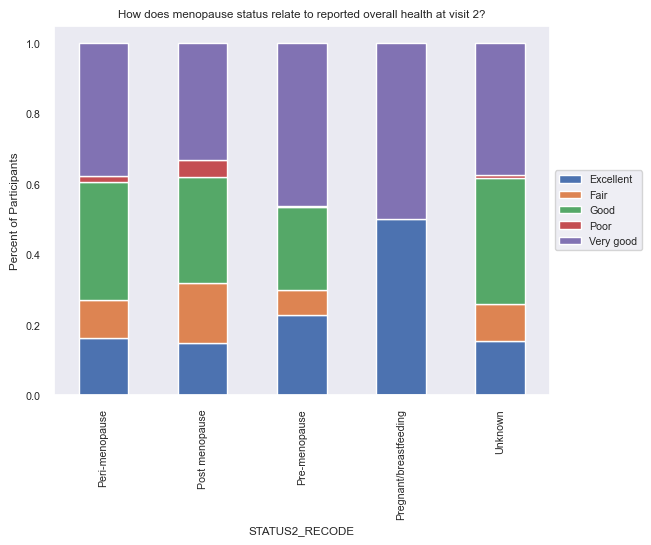

In [20]:
ax5=sns.countplot(df_subset, x='STATUS2', color = 'green',order = df_subset['STATUS2'].value_counts().index)
plt.xticks(rotation=90)
order = df_subset.groupby(["STATUS2_RECODE"])["FSH2"].median().sort_values(ascending=False).index
sns.set(font_scale=0.7)
plt.grid(False)
plt.title('What was participant menopause status at visit 2?')
plt.show()


ax6=sns.barplot(x = df_subset["STATUS2_RECODE"], y = df_subset["FSH2"],order=order, errorbar=None, color = 'green')
plt.suptitle('During visit 2, how did FSH vary by menopause status?')
plt.title('Line represents 25.8 mU/m, the normal threshold for women after menopause')
plt.ylabel('Median Follicle Stimulating Hormone Measure')
plt.grid(False)
plt.xlabel('')
plt.axhline(y=25.8, linewidth=2, color='orange')
plt.grid(False)
plt.show()

ax7=df_subset.groupby('STATUS2_RECODE')['HOTFLAS2_RECODE'].value_counts(normalize=True).unstack('HOTFLAS2_RECODE').plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('How often were hot flashes reported as a symptom based on menopause status?')
plt.grid(False)

chart = df_subset.groupby('STATUS2_RECODE')['OVERHLT2'].value_counts(normalize=True).unstack('OVERHLT2').plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('How does menopause status relate to reported overall health at visit 2?')
plt.ylabel('Percent of Participants')
plt.grid(False)
plt.show()

There is an extensive amount of data in these files and many more insights to be derived with more time to explore the data. However, the analysis and visualizations above give us a jumping off point for data exploration.